In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import pandas as pd

import glob

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
def frequencies(df, max_steps=10**7):
    df = df.drop_duplicates()
    
    frequencies = []
    previous = 0
    for value in df["t"][1:]:
        frequencies.append(value - previous)
        previous = value
    frequencies.append(max_steps - previous)

    df["frequencies"] = np.array(frequencies)
    df["frequencies norm"] = np.array(frequencies) / max_steps

    return df

## Figure

In [5]:
columns = ['p_1', 'p_2', 'p_3', 'p_4', 't', 'cooperation']

columns_mem2 = ['p_1', 'p_2', 'p_3', 'p_4',
                'p_5', 'p_6', 'p_7', 'p_8',
                'p_9', 'p_10', 'p_11', 'p_12',
                'p_13', 'p_14', 'p_15', 'p_16',
                't', 'cooperation']

In [6]:
costs = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

In [7]:
memory_one_coops = []

for beta in ["0.1", "1", "2"]:

    folder = f"../src/evolution_simulations/MemorySimulations/data/memory_one_beta_{beta}_cost_"
    
    files = [folder + f"{c}.csv" for c in costs]
    
    dfs = [pd.read_csv(file, names=columns) for file in files]
    
    dfs = [frequencies(df, max_steps=10**7) for df in dfs]
    
    coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]
    
    memory_one_coops.append(coops)

In [8]:
memory_two_coops = []

for beta in ["0.1", "1", "2"]:

    folder = f"../src/evolution_simulations/MemorySimulations/data/memory_two_beta_{beta}_cost_"
    
    files = [folder + f"{c}.csv" for c in costs]
    
    dfs = [pd.read_csv(file, names=columns_mem2) for file in files]
    
    dfs = [frequencies(df, max_steps=10**7) for df in dfs]
    
    coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]
    
    memory_two_coops.append(coops)

In [9]:
memory_one_counting_coops = []

for beta in ["0.1", "1", "2"]:

    folder = f"../src/evolution_simulations/MemorySimulations/data/memory_one_counting_beta_{beta}_cost_"
    
    files = [folder + f"{c}.csv" for c in costs]
    
    dfs = [pd.read_csv(file, names=columns) for file in files]
    
    dfs = [frequencies(df, max_steps=10**7) for df in dfs]
    
    coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]
    
    memory_one_counting_coops.append(coops)

In [10]:
memory_two_counting_coops = []

for beta in ["0.1", "1", "2"]:

    folder = f"../src/evolution_simulations/MemorySimulations/data/memory_two_counting_beta_{beta}_cost_"
    
    files = [folder + f"{c}.csv" for c in costs]
    
    dfs = [pd.read_csv(file, names=columns) for file in files]
    
    dfs = [frequencies(df, max_steps=10**7) for df in dfs]
    
    coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]
    
    memory_two_counting_coops.append(coops)

In [11]:
memory_three_counting_coops = []

for beta in ["0.1", "1", "2"]:

    folder = f"../src/evolution_simulations/MemorySimulations/data/memory_three_counting_beta_{beta}_cost_"
    
    files = [folder + f"{c}.csv" for c in costs]
    
    dfs = [pd.read_csv(file, names=columns) for file in files]
    
    dfs = [frequencies(df, max_steps=10**7) for df in dfs]
    
    coops = [sum(df['cooperation'] * df['frequencies norm']) for df in dfs]
    
    memory_three_counting_coops.append(coops)

In [12]:
linestyles = ["-o", "--o", ":o"]

AttributeError: 'Axes' object has no attribute 'xlabel'

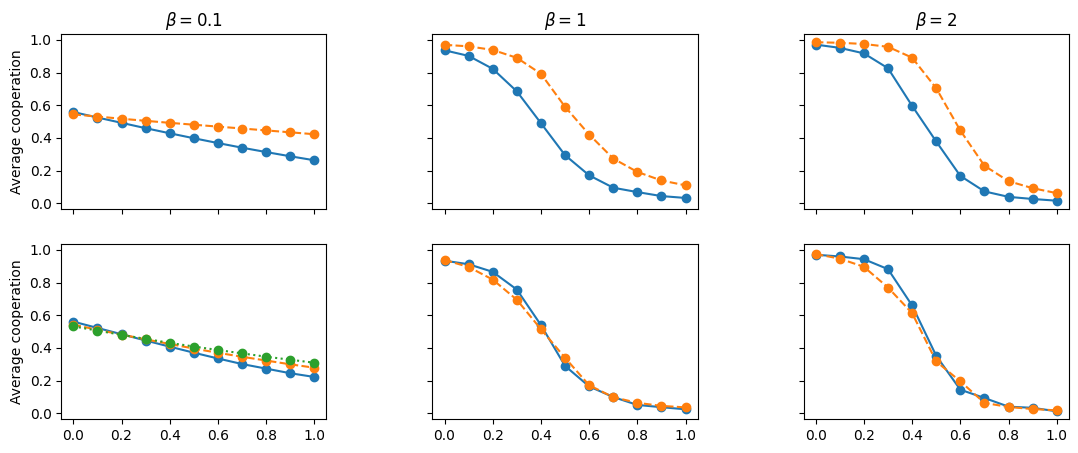

In [14]:
fig, axes = plt.subplot_mosaic("ABC;DEF",
                               figsize=(13, 5),
                               gridspec_kw = {'height_ratios':[1, 1], "wspace": 0.4},
                               sharex=True,
                               sharey=True,
                               )

axes['A'].set_title(r'$\beta=0.1$');
axes['B'].set_title(r'$\beta=1$');
axes['C'].set_title(r'$\beta=2$');

# axes['A'].set_ylim(0, 1)

for letter in ["A", "D"]:
    axes[letter].set_ylabel("Average cooperation")
    
    
# for letter in ["D", "E", "F"]:
#     axes[letter].set_xlabel("population size ($N$)")
    

for coop, letter in zip(memory_one_coops, ["A", "B", "C"]):
    axes[letter].plot(costs, coop, linestyles[0])
    
for coop, letter in zip(memory_two_coops, ["A", "B", "C"]):
    axes[letter].plot(costs, coop, linestyles[1])
    
for coop, letter in zip(memory_one_counting_coops, ["D", "E", "F"]):
    axes[letter].plot(costs, coop, linestyles[0], label='$n=1$')
    
for coop, letter in zip(memory_two_counting_coops, ["D", "E", "F"]):
    axes[letter].plot(costs, coop, linestyles[1], label="$n=2$")
    
for coop, letter in zip(memory_three_counting_coops, ["D", "E", "F"]):
    axes[letter].plot(costs, coop, linestyles[2], label="$n=3$")
    axes[letter].set_xlabel("cost ($c$)")
    
axes['D'].legend(fontsize=12, frameon=False)
    
axes['A'].text(-.5, .15, "Memory-$n$ \n strategies",
               rotation=90,
               fontsize=14,
               fontweight='bold',
               horizontalalignment='center');

axes['D'].text(-.5, -.2, "Memory-$n$ \n counting strategies",
               rotation=90,
               fontsize=14,
               fontweight='bold',
               horizontalalignment='center');

fig.savefig("../figures/siFigMemorySim.pdf", bbox_inches="tight")